# **Projeto Integrador: ETL com Google Colab e BigQuery**
Objetivo do Projeto
Você foi contratado por uma empresa de e-commerce para unificar informações espalhadas em diferentes arquivos, fazer a limpeza e transformação desses dados, e enviar o resultado para um banco Data Warehouse (Google BigQuery). Seu desafio é construir uma pipeline de ETL (Extração, Transformação e Carga) no Google Colab para centralizar essas informações de maneira eficiente e segura.


Aluno: Luan Alysson de Souza

In [ ]:
#1 Subir os três arquivos para o Google Colab e carregá-los com a biblioteca pandas; Passo 1

In [ ]:
import pandas as pd

In [ ]:
df_clientes = pd.read_csv('https://docs.google.com/spreadsheets/d/1Z8lv-BuFb4mSlOCGw4AKGvXA5B0y_4xZQ_ahYNArOso/export?format=csv')
df_clientes.head(10)

,cliente_id,nome,email,data_nascimento,genero,estado
0,1,Ana Sophia Araújo,levicunha@ig.com.br,1961-03-08,Masculino,BA
1,2,Sarah Viana,bazevedo@da.com,1992-05-26,Masculino,RJ
2,3,Theo Viana,ana-liviafreitas@gmail.com,2005-11-05,Outro,RJ
3,4,Samuel Pereira,henrique35@gmail.com,1960-07-09,Masculino,SP
4,5,Ana Luiza Moraes,bryan78@gmail.com,1979-12-20,Masculino,CE
5,6,Marcos Vinicius Gonçalves,marianecampos@gmail.com,1999-03-17,Outro,RS
6,7,Vitor Gonçalves,eduardonascimento@ramos.br,1965-04-11,Outro,CE
7,8,Dr. Emanuel Fogaça,emillyfarias@rezende.net,2000-10-18,Feminino,DF
8,9,Sr. Enzo Azevedo,efogaca@hotmail.com,1992-10-21,Masculino,MG
9,10,Sra. Clara Sales,qda-conceicao@hotmail.com,1970-12-28,Feminino,BA


In [ ]:
df_pedidos = pd.read_csv('https://docs.google.com/spreadsheets/d/1EGBfkBMJ23rOJDqem4vHZVszBEdyadjFaDvRvdqDPeo/export?format=csv')
df_pedidos.head(5)

,pedido_id,cliente_id,data_pedido,valor_total,status
0,1,31,2024-01-07,302.33,Finalizado
1,2,86,2023-11-18,663.23,Cancelado
2,3,41,2024-07-16,932.57,Finalizado
3,4,2,2024-09-26,485.37,Em Processamento
4,5,13,2025-02-04,119.60,Finalizado


In [ ]:
df_pagamentos = pd.read_csv('https://docs.google.com/spreadsheets/d/1uxlZl8MgddVIQJZjGOuEQdikBWL9rG3Tas7xXIv9U2E/export?format=csv')
df_pagamentos.head(5)

,pagamento_id,pedido_id,metodo_pagamento,valor_pago,data_pagamento
0,1,1,Pix,302.33,2024-03-17
1,2,2,Boleto,663.23,2024-09-19
2,3,3,Boleto,33.46,2024-07-21
3,4,4,Pix,485.37,2024-11-16
4,5,5,Cartão de Crédito,119.60,2025-03-02


In [ ]:
#1 Tratar dados faltantes ou inconsistentes; Passo 2

In [ ]:
df_clientes['data_nascimento'] = pd.to_datetime(df_clientes['data_nascimento'], errors='coerce')
df_pedidos['data_pedido'] = pd.to_datetime(df_pedidos['data_pedido'], errors='coerce')
df_pagamentos['data_pagamento'] = pd.to_datetime(df_pagamentos['data_pagamento'], errors='coerce')
df_pedidos['valor_total'] = pd.to_numeric(df_pedidos['valor_total'], errors='coerce')
df_pagamentos['valor_pago'] = pd.to_numeric(df_pagamentos['valor_pago'], errors='coerce')


In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cliente_id       100 non-null    int64         
 1   nome             100 non-null    object        
 2   email            99 non-null     object        
 3   data_nascimento  100 non-null    datetime64[ns]
 4   genero           100 non-null    object        
 5   estado           100 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
import pandas as pd
from datetime import datetime

# Convertendo a coluna data_nascimento para datetime
df_clientes['data_nascimento'] = pd.to_datetime(df_clientes['data_nascimento'])

# Calculando a idade
hoje = pd.to_datetime(datetime.now()) # data atual


In [ ]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pedido_id    200 non-null    int64         
 1   cliente_id   200 non-null    int64         
 2   data_pedido  200 non-null    datetime64[ns]
 3   valor_total  200 non-null    float64       
 4   status       200 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.9+ KB


In [ ]:
df_pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pagamento_id      200 non-null    int64         
 1   pedido_id         200 non-null    int64         
 2   metodo_pagamento  200 non-null    object        
 3   valor_pago        200 non-null    float64       
 4   data_pagamento    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.9+ KB


In [ ]:
print(df_clientes.isnull().sum())
print(df_pedidos.isnull().sum())
print(df_pagamentos.isnull().sum()) #retirado espaços em branco

cliente_id         0
nome               0
email              1
data_nascimento    0
genero             0
estado             0
dtype: int64
pedido_id      0
cliente_id     0
data_pedido    0
valor_total    0
status         0
dtype: int64
pagamento_id        0
pedido_id           0
metodo_pagamento    0
valor_pago          0
data_pagamento      0
dtype: int64


In [ ]:
df_clientes.info() #Convertidos valores numéricos e data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cliente_id       100 non-null    int64         
 1   nome             100 non-null    object        
 2   email            99 non-null     object        
 3   data_nascimento  100 non-null    datetime64[ns]
 4   genero           100 non-null    object        
 5   estado           100 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df_clientes.head(5)

,cliente_id,nome,email,data_nascimento,genero,estado
0,1,Ana Sophia Araújo,levicunha@ig.com.br,1961-03-08,Masculino,BA
1,2,Sarah Viana,bazevedo@da.com,1992-05-26,Masculino,RJ
2,3,Theo Viana,ana-liviafreitas@gmail.com,2005-11-05,Outro,RJ
3,4,Samuel Pereira,henrique35@gmail.com,1960-07-09,Masculino,SP
4,5,Ana Luiza Moraes,bryan78@gmail.com,1979-12-20,Masculino,CE


In [ ]:
df_clientes.columns

Index(['cliente_id', 'nome', 'email', 'data_nascimento', 'genero', 'estado'], dtype='object')

In [ ]:
df_pedidos.columns

Index(['pedido_id', 'cliente_id', 'data_pedido', 'valor_total', 'status'], dtype='object')

In [ ]:
df_pagamentos.columns

Index(['pagamento_id', 'pedido_id', 'metodo_pagamento', 'valor_pago',
       'data_pagamento'],
      dtype='object')

In [ ]:
#3 Unificar as bases; Passo 3

In [ ]:
df_pedidos_clientes = df_pedidos.merge(df_clientes, on="cliente_id", how="left") #juntei pedido com cliente
df_final = df_pedidos_clientes.merge(df_pagamentos, on="pedido_id", how="left") # juntei pagamento com pedido cliente


In [ ]:
# Transformar os dados; Passo 4

In [ ]:
import pandas as pd
from datetime import datetime

# Convertendo a coluna data_nascimento para datetime
df_clientes['data_nascimento'] = pd.to_datetime(df_clientes['data_nascimento'])

# Calculando a idade
hoje = pd.to_datetime(datetime.now()) # data atual
df_final['idade'] = hoje.year - df_clientes['data_nascimento'].dt.year - ((hoje.month < df_clientes['data_nascimento'].dt.month) | ((hoje.month == df_clientes['data_nascimento'].dt.month) & (hoje.day < df_clientes['data_nascimento'].dt.day)))

# Criação de uma nova coluna chamada idade a partir de data_nascimento;

In [ ]:
colunas_texto = ["nome", "email", "estado", "status", "metodo_pagamento"]
for col in colunas_texto:
    df_final[col] = df_final[col].astype(str).str.lower().str.strip().str.replace(r'\s+', ' ', regex=True) #transformação em caractere lower e correção de espaços extras
df_final.head()


<ipython-input-76-012a63273160>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col] = df_final[col].astype(str).str.lower().str.strip().str.replace(r'\s+', ' ', regex=True) #transformação em caractere lower e correção de espaços extras
<ipython-input-76-012a63273160>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col] = df_final[col].astype(str).str.lower().str.strip().str.replace(r'\s+', ' ', regex=True) #transformação em caractere lower e correção de espaços extras
<ipython-input-76-

,cliente_id,nome,email,estado,data_pedido,valor_total,status,metodo_pagamento,valor_pago,data_pagamento,idade
0,31,joão lucas gomes,tviana@souza.com,sc,2024-01-07,302.33,finalizado,pix,302.33,2024-03-17,64.0
1,86,sarah martins,carvalholorenzo@ig.com.br,ba,2023-11-18,663.23,cancelado,boleto,663.23,2024-09-19,32.0
2,41,nicole teixeira,correialuiz-henrique@hotmail.com,ba,2024-07-16,932.57,finalizado,boleto,33.46,2024-07-21,19.0
3,2,sarah viana,bazevedo@da.com,rj,2024-09-26,485.37,em processamento,pix,485.37,2024-11-16,64.0
4,13,letícia souza,correiamaria-julia@bol.com.br,ba,2025-02-04,119.60,finalizado,cartão de crédito,119.60,2025-03-02,45.0


In [ ]:
df_final = df_final[[
    "cliente_id", "nome", "email", "estado",
    "data_pedido", "valor_total", "status",
    "metodo_pagamento", "valor_pago", "data_pagamento", "idade"
]]
df_final.head(5)
#organização das colunas

,cliente_id,nome,email,estado,data_pedido,valor_total,status,metodo_pagamento,valor_pago,data_pagamento,idade
0,31,joão lucas gomes,tviana@souza.com,sc,2024-01-07,302.33,finalizado,pix,302.33,2024-03-17,64.0
1,86,sarah martins,carvalholorenzo@ig.com.br,ba,2023-11-18,663.23,cancelado,boleto,663.23,2024-09-19,32.0
2,41,nicole teixeira,correialuiz-henrique@hotmail.com,ba,2024-07-16,932.57,finalizado,boleto,33.46,2024-07-21,19.0
3,2,sarah viana,bazevedo@da.com,rj,2024-09-26,485.37,em processamento,pix,485.37,2024-11-16,64.0
4,13,letícia souza,correiamaria-julia@bol.com.br,ba,2025-02-04,119.60,finalizado,cartão de crédito,119.60,2025-03-02,45.0


In [ ]:
df_final["pedido_pago"] = df_final["valor_pago"].fillna(0) >= df_final["valor_total"].fillna(0)

#pedido pago com coluna em booleano

In [ ]:
df_final.head()
# Tabela Final

,cliente_id,nome,email,estado,data_pedido,valor_total,status,metodo_pagamento,valor_pago,data_pagamento,idade,pedido_pago
0,31,joão lucas gomes,tviana@souza.com,sc,2024-01-07,302.33,finalizado,pix,302.33,2024-03-17,64.0,True
1,86,sarah martins,carvalholorenzo@ig.com.br,ba,2023-11-18,663.23,cancelado,boleto,663.23,2024-09-19,32.0,True
2,41,nicole teixeira,correialuiz-henrique@hotmail.com,ba,2024-07-16,932.57,finalizado,boleto,33.46,2024-07-21,19.0,False
3,2,sarah viana,bazevedo@da.com,rj,2024-09-26,485.37,em processamento,pix,485.37,2024-11-16,64.0,True
4,13,letícia souza,correiamaria-julia@bol.com.br,ba,2025-02-04,119.60,finalizado,cartão de crédito,119.60,2025-03-02,45.0,True


In [ ]:
!pip install --upgrade google-cloud-bigquery

In [ ]:
# prompt: Enviar a base final ao Google BigQuery, utilizando a biblioteca pandas-gbq e um projeto do Google Cloud já autenticado no ambiente.

# Tabela Final
!pip install --upgrade google-cloud-bigquery

auth.authenticate_user()

project_id = 'our-card-421916'  # Substitua pelo seu ID do projeto do Google Cloud
table_id = 'our-card-421916.ProjetoIntegrador.df_final'  # Substitua pelo ID do dataset e tabela no BigQuery

# Enviar o DataFrame para o BigQuery
df_final.to_gbq(destination_table=table_id, project_id=project_id, if_exists='replace')

print(f"DataFrame enviado para a tabela: {table_id}")


<ipython-input-64-d7841f2e96e8>:12: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  df_final.to_gbq(destination_table=table_id, project_id=project_id, if_exists='replace')
100%|██████████| 1/1 [00:00<00:00, 7319.90it/s]

DataFrame enviado para a tabela: our-card-421916.ProjetoIntegrador.df_final


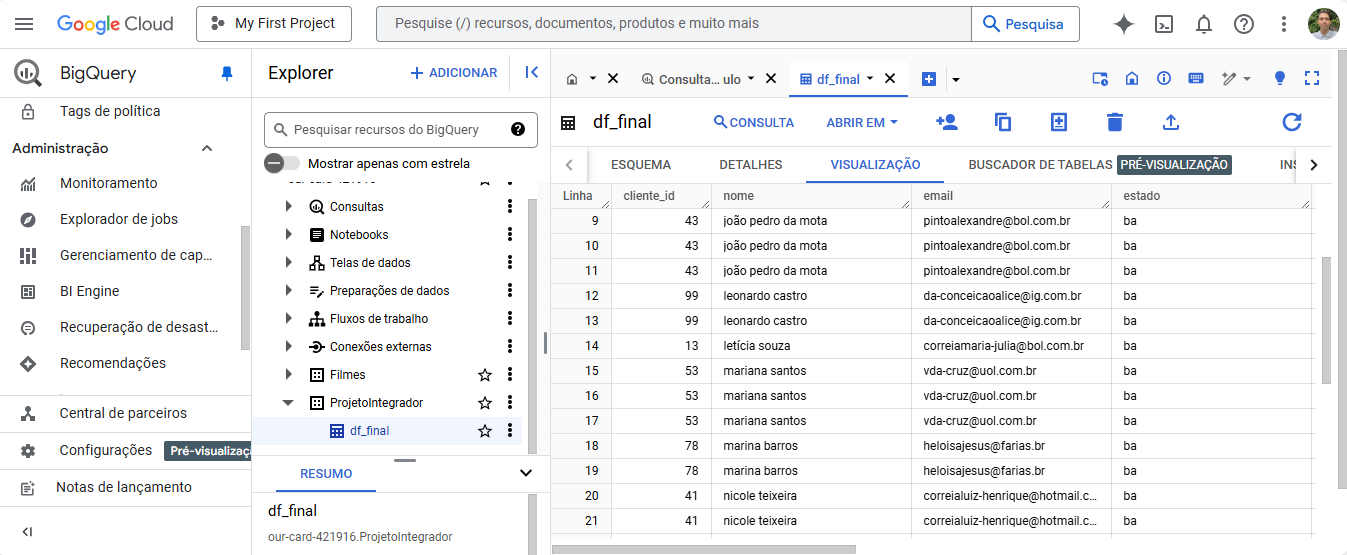

In [ ]:
'''
Fiz o upload de todos os arquivos, e trabalhei a limpeza de dados com a bibliteca
pandas conforme enunciado, achei importante o trabalho de limpeza pois ele
reflete totalmente no DataLake, e hoje entendo o porque é tão importante tratar dados.
Converter Strings em Inteiros, formato de data, são detalhes que sempre preciso estar atento, pois
pode refletir no resultado na tabela final. Logo em seguida, vizualizar as tabelas é necessário
para checar se os dados foram tratados corretamente.
Portanto, o processo de transformação é tão necessário, quanto apenas importar o código,
pois é apenas um comando, o que influencia de verdade são a limpeza dos dados feita
de forma eficaz. Existem diversas técnicas, mas observar o resultado final é essencial.

'''